In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data.count()

Country                             96
Year                                96
Life expectancy at birth (years)    96
GDP                                 96
dtype: int64

In [4]:
maxrows = data.Country.count()
print('Missing Data %')
print(1 - data.count()/maxrows)

Missing Data %
Country                             0.0
Year                                0.0
Life expectancy at birth (years)    0.0
GDP                                 0.0
dtype: float64


In [5]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
data.columns = ['Country1', 'Year', 'Life_expectancy1', 'GDP']

In [7]:
data.columns

Index(['Country1', 'Year', 'Life_expectancy1', 'GDP'], dtype='object')

In [8]:
data = data.rename({'Country1':'Country', 'Life_expectancy1':'Life_expectancy'}, axis=1)

In [9]:
data.columns

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')

In [10]:
data.dtypes

Country             object
Year                 int64
Life_expectancy    float64
GDP                float64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [12]:
data.GDP = data.GDP/1000000000

In [13]:
data.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [14]:
print(f'''There are {data.Country.nunique()} countries in the sample and these are as follows:
{data.Country.unique()}''')

There are 6 countries in the sample and these are as follows:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [15]:
data.Country.replace('United States of America', 'USA', inplace=True)

In [16]:
#data.Country.unique()

In [17]:
print(f'''The analysis starts from {np.min(data.Year)} and ends at {np.max(data.Year)} meaning that the dataset
is including {data.Year.nunique()} consecutive years of GDP and Life expectancy data.''')

The analysis starts from 2000 and ends at 2015 meaning that the dataset
is including 16 consecutive years of GDP and Life expectancy data.


In [18]:
print(data.GDP.head())

0    77.860932
1    70.979924
2    69.736811
3    75.643460
4    99.210393
Name: GDP, dtype: float64


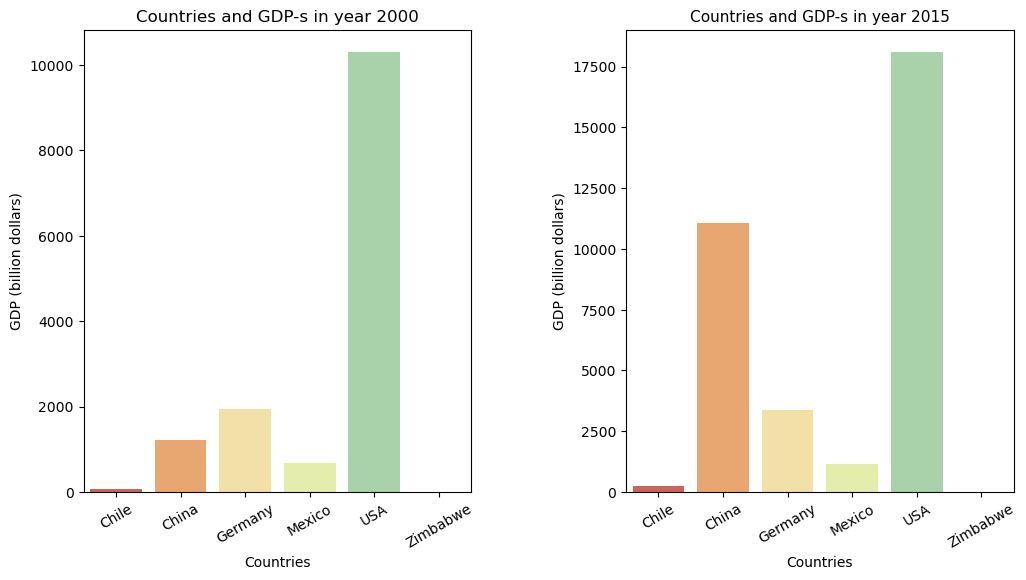

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=[12, 6])
plt.subplot(1,2,1)
sns.barplot(x='Country', y='GDP', data=data[data.Year == np.min(data.Year)], palette='Spectral')
plt.title(f'Countries and GDP-s in year {np.min(data.Year)}', fontsize=12)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('GDP (billion dollars)', fontsize=10)
plt.subplot(1,2,2)
sns.barplot(x='Country', y='GDP', data=data[data.Year == np.max(data.Year)], palette='Spectral')
plt.title(f'Countries and GDP-s in year {np.max(data.Year)}', fontsize=11)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('GDP (billion dollars)', fontsize=10)
plt.subplots_adjust(wspace=0.4)
plt.show()
plt.clf()

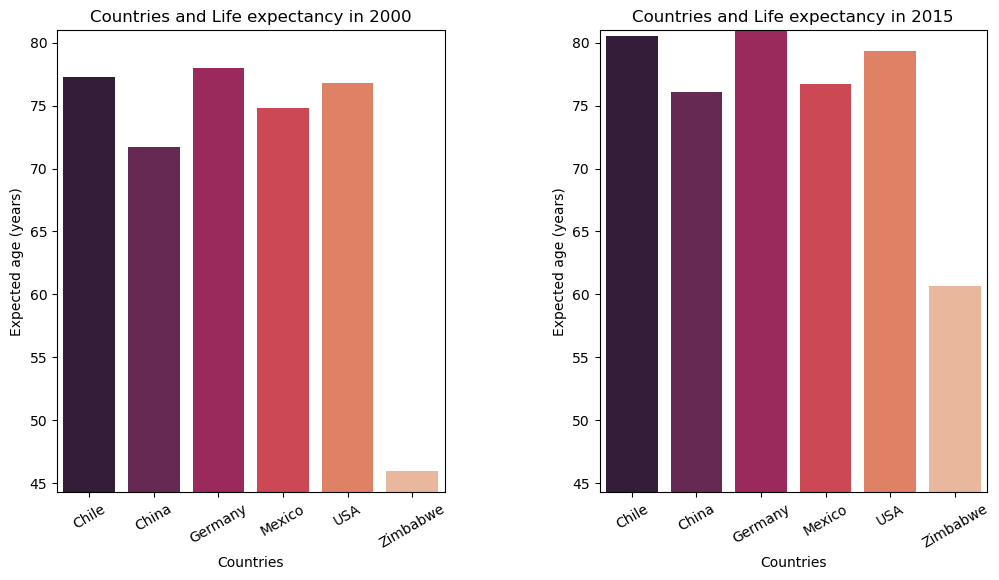

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=[12, 6])
plt.subplot(1,2,1)
sns.barplot(x='Country', y='Life_expectancy', data=data[data.Year == np.min(data.Year)], palette='rocket')
plt.title(f'Countries and Life expectancy in {np.min(data.Year)}', fontsize=12)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Expected age (years)', fontsize=10)
plt.ylim([np.min(data.Life_expectancy), np.max(data.Life_expectancy)])
plt.subplot(1,2,2)
sns.barplot(x='Country', y='Life_expectancy', data=data[data.Year == np.max(data.Year)], palette='rocket')
plt.title(f'Countries and Life expectancy in {np.max(data.Year)}', fontsize=12)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Expected age (years)', fontsize=10)
plt.ylim([np.min(data.Life_expectancy), np.max(data.Life_expectancy)])
plt.subplots_adjust(wspace=0.4)
plt.show()
plt.clf()

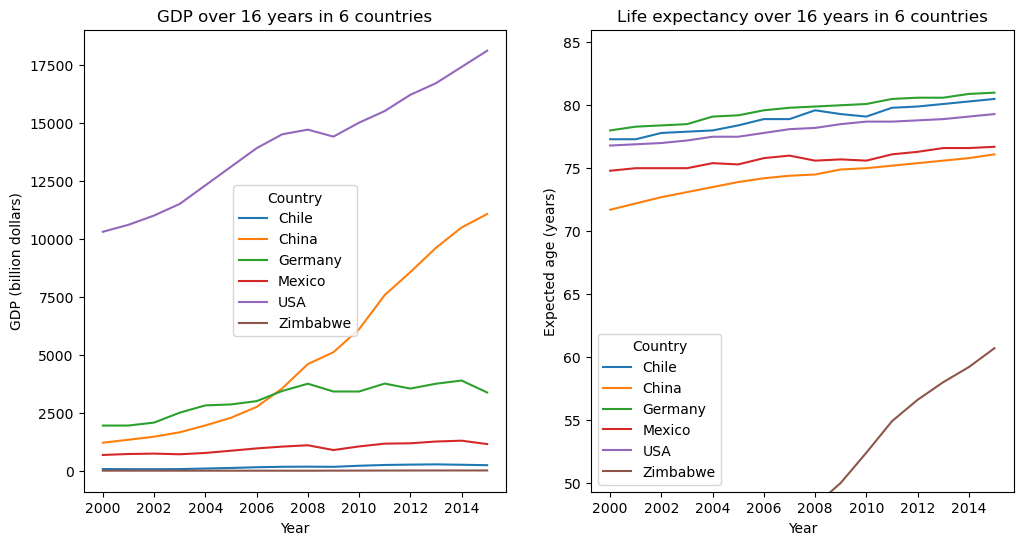

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=[12, 6])
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='GDP', hue='Country', data=data)
plt.title(f'GDP over {data.Year.nunique()} years in {data.Country.nunique()} countries', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GDP (billion dollars)', fontsize=10)
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='Life_expectancy', hue='Country', data=data)
plt.title(f'Life expectancy over {data.Year.nunique()} years in {data.Country.nunique()} countries', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Expected age (years)', fontsize=10)
plt.ylim([np.min(data.Life_expectancy)+5, np.max(data.Life_expectancy)+5])
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.clf()

In [22]:
chile = data[data.Country == 'Chile']
china = data[data.Country == 'China']
ger = data[data.Country == 'Germany']
mex = data[data.Country == 'Mexico']
usa = data[data.Country == 'USA']
zimb = data[data.Country == 'Zimbabwe']

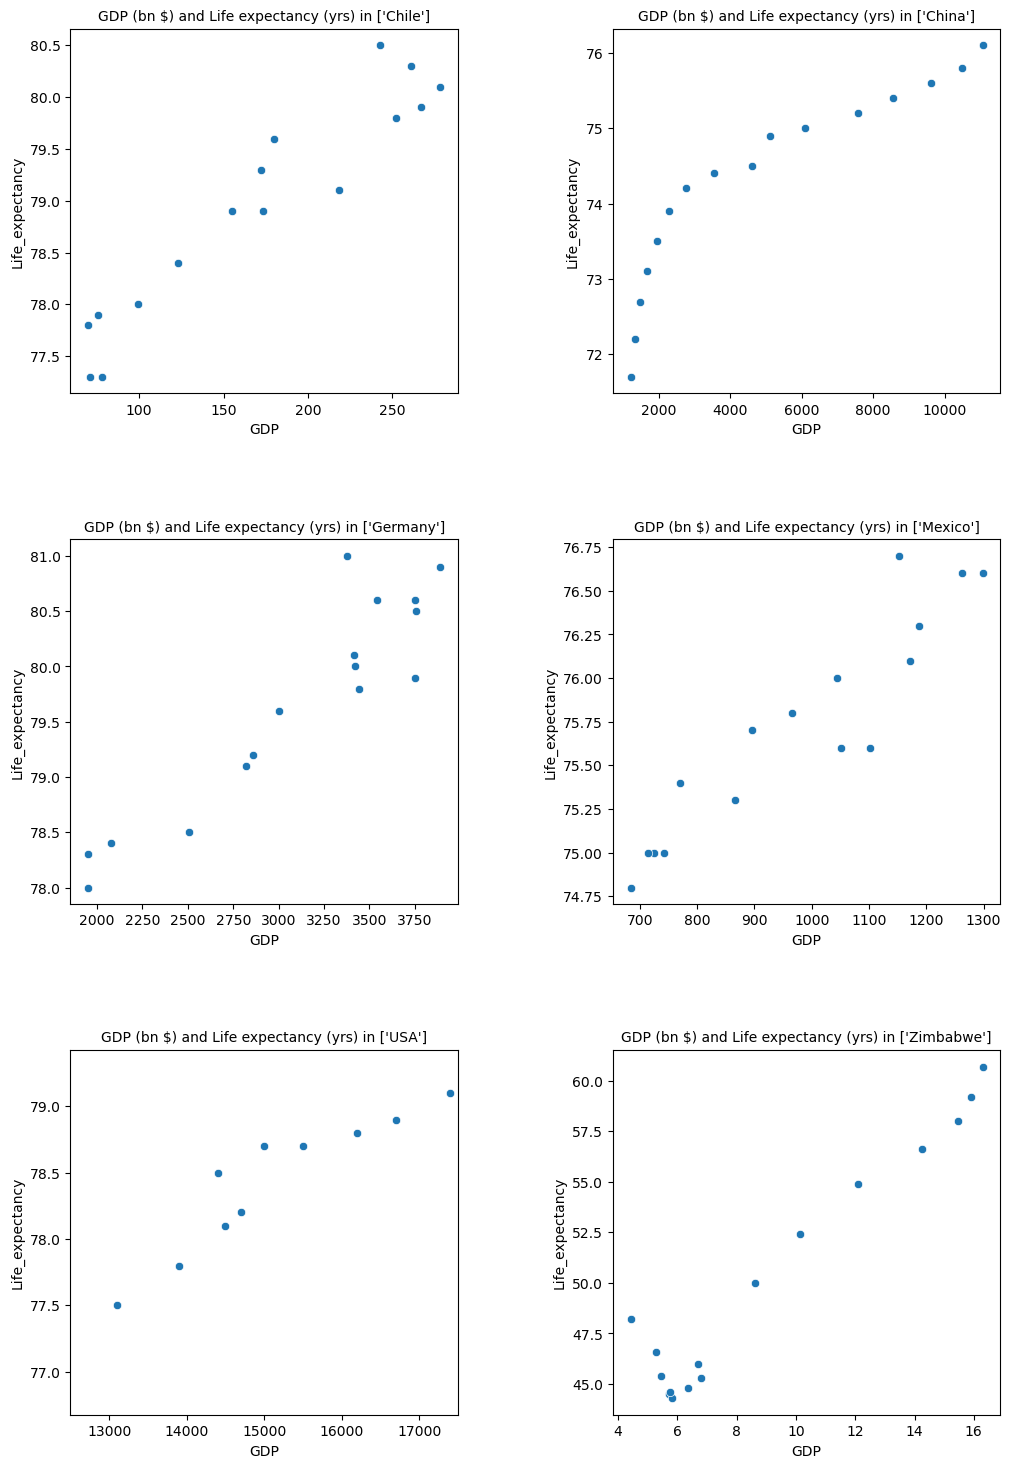

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=[12, 18])

plt.subplot(3,2,1)
sns.scatterplot(x='GDP', y='Life_expectancy', data=chile)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {chile.Country.unique()}', fontsize=10)

plt.subplot(3,2,2)
sns.scatterplot(x='GDP', y='Life_expectancy', data=china)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {china.Country.unique()}', fontsize=10)

plt.subplot(3,2,3)
sns.scatterplot(x='GDP', y='Life_expectancy', data=ger)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {ger.Country.unique()}', fontsize=10)

plt.subplot(3,2,4)
sns.scatterplot(x='GDP', y='Life_expectancy', data=mex)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {mex.Country.unique()}', fontsize=10)

plt.subplot(3,2,5)
sns.scatterplot(x='GDP', y='Life_expectancy', data=usa)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {usa.Country.unique()}', fontsize=10)
plt.xlim([12500, 17500])

plt.subplot(3,2,6)
sns.scatterplot(x='GDP', y='Life_expectancy', data=zimb)
plt.title(f'GDP (bn $) and Life expectancy (yrs) in {zimb.Country.unique()}', fontsize=10)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
plt.clf()

In [24]:
countries = [chile, china, ger, mex, usa, zimb]

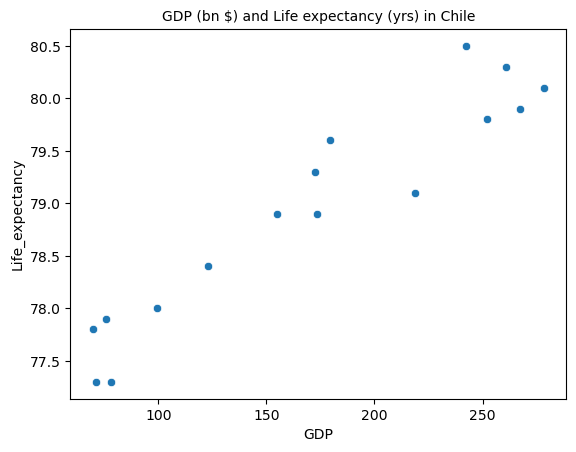

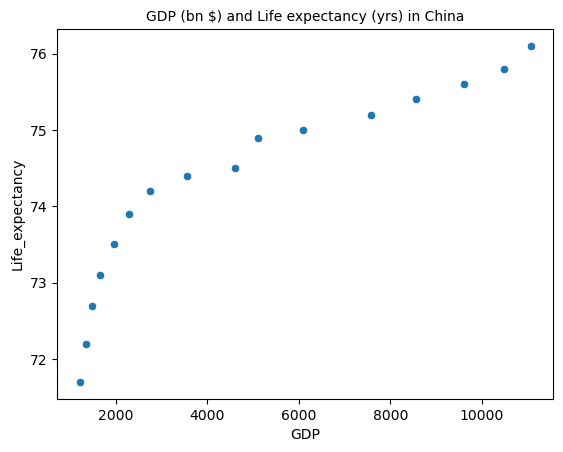

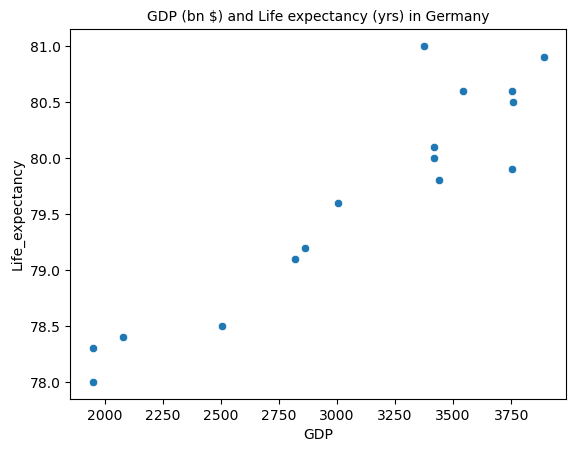

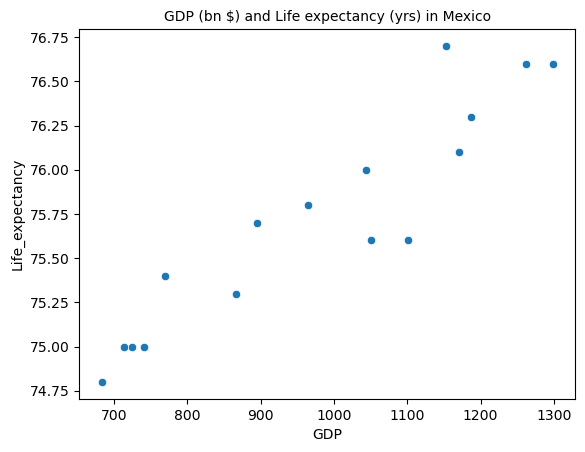

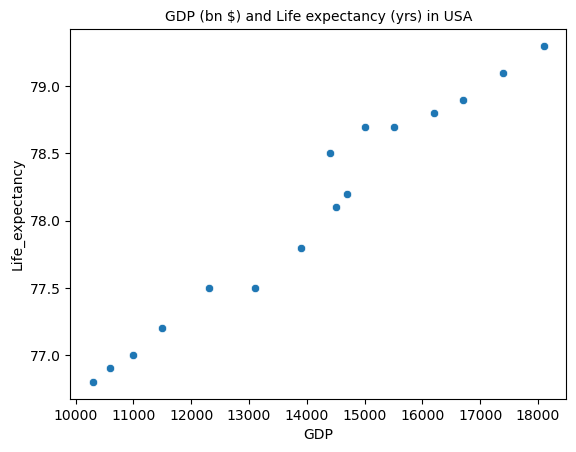

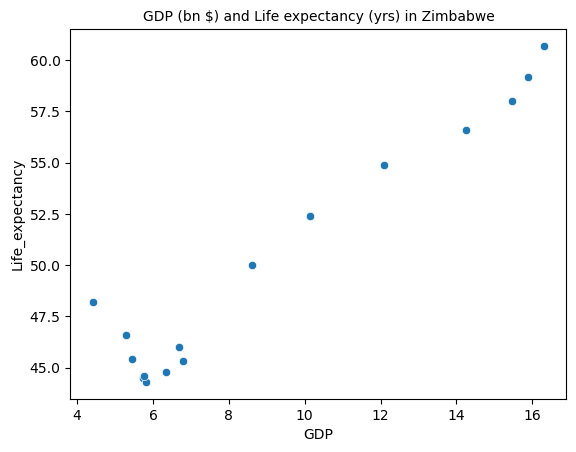

<Figure size 640x480 with 0 Axes>

In [44]:
for country in countries:
    sns.scatterplot(x='GDP', y='Life_expectancy', data=country)
    plt.title(f'GDP (bn $) and Life expectancy (yrs) in {country.Country.unique()[0]}', fontsize=10)
    plt.show()
    plt.clf()

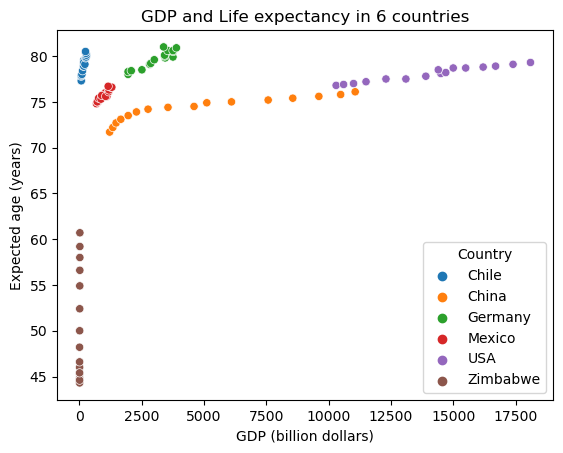

<Figure size 640x480 with 0 Axes>

In [26]:
sns.scatterplot(x='GDP', y='Life_expectancy', data=data, hue='Country')
plt.title(f'GDP and Life expectancy in {data.Country.nunique()} countries', fontsize=12)
plt.xlabel('GDP (billion dollars)', fontsize=10)
plt.ylabel('Expected age (years)', fontsize=10)
plt.show()
plt.clf()

In [27]:
corr1, r1 = pearsonr(usa.GDP, usa.Life_expectancy)

In [28]:
print(f'''There is a strong positive relationship between the GDP and Life expectancy in the USA according to this plot.
The correlation quotient is {corr1}.''')

There is a strong positive relationship between the GDP and Life expectancy in the USA according to this plot.
The correlation quotient is 0.9817092382430257.


In [29]:
corr_all, r_all = pearsonr(data.GDP, data.Life_expectancy)

In [30]:
print(f'''If we analyse the 6 countries there is also a positive linear relationship between the GDP and Life expectancy,
because the correlation quotient is {corr_all}.''')

If we analyse the 6 countries there is also a positive linear relationship between the GDP and Life expectancy,
because the correlation quotient is 0.34320674844915594.


In [31]:
np.mean(chile.Life_expectancy)


78.94375

In [32]:
np.mean(china.Life_expectancy)

74.26249999999999

In [33]:
np.mean(ger.Life_expectancy)

79.65625

In [34]:
np.mean(mex.Life_expectancy)

75.71875

In [35]:
np.mean(usa.Life_expectancy)

78.0625

In [36]:
np.mean(zimb.Life_expectancy)

50.09375

In [37]:
for country in countries:
    print(f'The average Life expectancy in years in {country.Country.unique()[0]} is {int(np.mean(country.Life_expectancy))}')

The average Life expectancy in years in Chile is 78
The average Life expectancy in years in China is 74
The average Life expectancy in years in Germany is 79
The average Life expectancy in years in Mexico is 75
The average Life expectancy in years in USA is 78
The average Life expectancy in years in Zimbabwe is 50


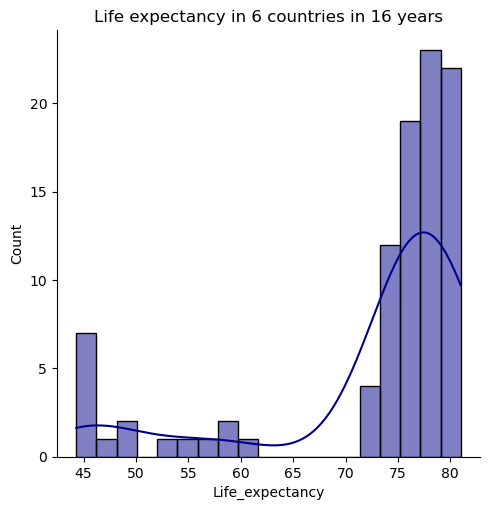

<Figure size 640x480 with 0 Axes>

In [38]:
sns.displot(data.Life_expectancy, kde=True, color='darkblue')
plt.title(f'Life expectancy in {data.Country.nunique()} countries in {data.Year.nunique()} years', fontsize = 12)
plt.show()
plt.clf()

In [39]:
print('''Conclusions:
      
1. There is a positive relationship between GDP and Life expectancy of one country, meaning that
if the annual GDP grows, the expected age at birth will be also increasing regardless the country is
developed or developing.
2. The average expected ages are very close to each other of every nations in the sample except Zimbabwe.
3. Both the annual GDP and the Life expectancy have increased during the overall period under examination.
4. There are 2 significant increasings/outliers in the sample. The first one is the GDP of China, the second one
is the Life expectancy in Zimbabwe.''')

Conclusions:
      
1. There is a positive relationship between GDP and Life expectancy of one country, meaning that
if the annual GDP grows, the expected age at birth will be also increasing regardless the country is
developed or developing.
2. The average expected ages are very close to each other of every nations in the sample except Zimbabwe.
3. Both the annual GDP and the Life expectancy have increased during the overall period under examination.
4. There are 2 significant increasings/outliers in the sample. The first one is the GDP of China, the second one
is the Life expectancy in Zimbabwe.


In [40]:
a = data.GDP[(data.Year == 2000) & (data.Country == 'China')].iloc[0]

In [41]:
a

1211.35

In [42]:
b = data.GDP[(data.Year == 2015) & (data.Country == 'China')].iloc[0]

In [43]:
b/a

9.134189127832585